In [1]:
import os, sys, glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

import matplotlib
import matplotlib.pyplot as plt


## Prepare data (VLAAI test data)




In [2]:
# Load data set
read_path = "../../prj_neuroread/data/DTU_val/"
#print(os.listdir(read_path))
files_path = glob.glob(os.path.join(read_path, "*.npz"))
print(len(files_path))
# Participants list
part_ids = sorted(list(set([os.path.basename(f).split("_")[1] for f in files_path])))
print(part_ids)
print(len(part_ids))
print(files_path[:10])

180
['S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
18
['../../prj_neuroread/data/DTU_val/DTU_S5_004.npz', '../../prj_neuroread/data/DTU_val/DTU_S12_004.npz', '../../prj_neuroread/data/DTU_val/DTU_S4_001.npz', '../../prj_neuroread/data/DTU_val/DTU_S13_001.npz', '../../prj_neuroread/data/DTU_val/DTU_S17_009.npz', '../../prj_neuroread/data/DTU_val/DTU_S17_008.npz', '../../prj_neuroread/data/DTU_val/DTU_S13_000.npz', '../../prj_neuroread/data/DTU_val/DTU_S4_000.npz', '../../prj_neuroread/data/DTU_val/DTU_S12_005.npz', '../../prj_neuroread/data/DTU_val/DTU_S5_005.npz']


In [3]:
eegs = torch.stack([torch.from_numpy(np.load(f)["eeg"]) for f in files_path])
envs = torch.stack([torch.from_numpy(np.load(f)["envelope"]) for f in files_path])
print(eegs.shape, envs.shape)

eegs = eegs.permute(0, 2, 1)
envs = envs.permute(0, 2, 1)
print(eegs.shape, envs.shape)

torch.Size([180, 3200, 64]) torch.Size([180, 3200, 1])
torch.Size([180, 64, 3200]) torch.Size([180, 1, 3200])


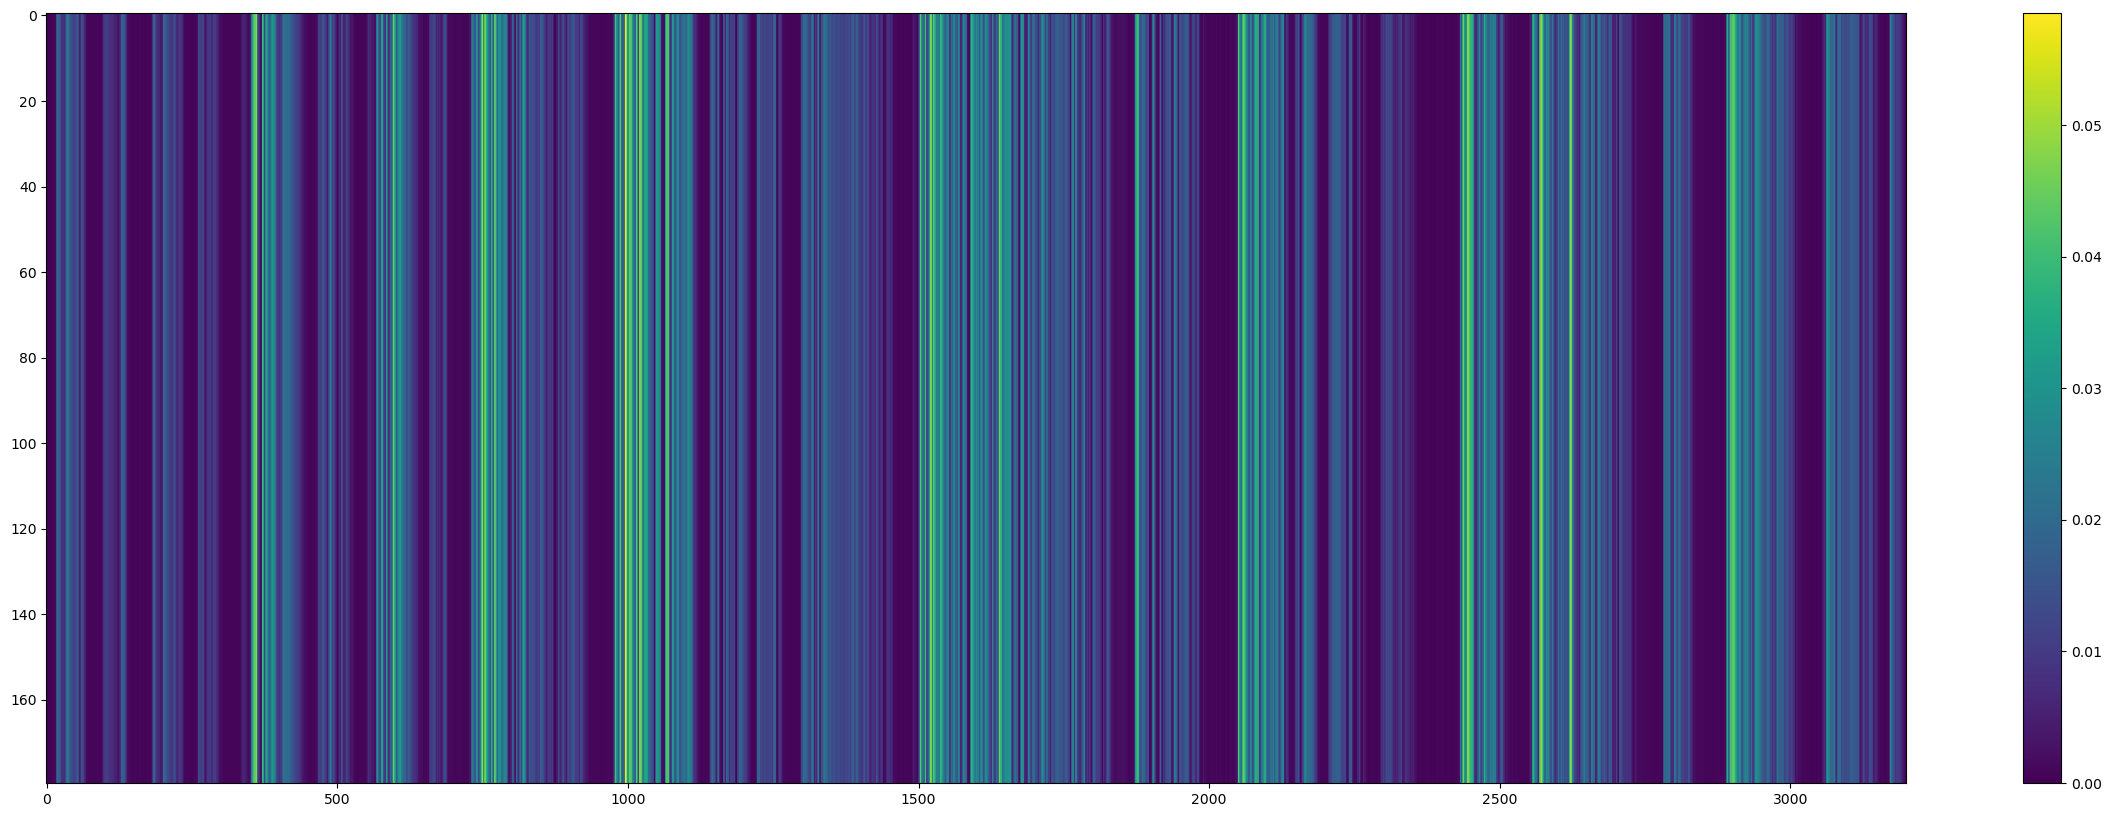

In [4]:
plt.figure(figsize=(30, 10))
plt.imshow(envs[:, 0, :], aspect='auto', interpolation='nearest')
plt.colorbar()

In [5]:
# Inspect data
print(eegs.mean(), eegs.std(), eegs.max(), eegs.min())
for ix in range(eegs.shape[0]):
    print("%.1f  %.1f  %.1f  %.1f"  % (eegs[ix].mean().item(), eegs[ix].std().item(), eegs[ix].max().item(), eegs[ix].min().item())) 


tensor(-1.1921e-10) tensor(12.3565) tensor(2259.8845) tensor(-1897.6287)
-0.0  4.0  84.9  -38.0
-0.0  6.3  38.3  -47.9
0.0  6.0  51.5  -65.0
-0.0  4.4  81.9  -65.7
-0.0  4.6  37.4  -34.4
-0.0  4.6  28.4  -36.1
-0.0  4.0  117.6  -22.6
0.0  5.2  70.1  -69.4
0.0  7.0  46.5  -49.2
0.0  4.8  60.4  -140.0
-0.0  5.1  35.8  -53.2
0.0  6.4  40.3  -46.0
-0.0  5.0  40.2  -40.1
-0.0  5.6  44.5  -102.8
0.0  4.2  91.2  -138.1
0.0  3.9  20.1  -23.9
0.0  5.1  39.1  -49.3
-0.0  5.6  78.3  -67.3
-0.0  6.7  48.2  -45.0
-0.0  4.6  36.5  -39.9
-0.0  6.2  37.2  -47.8
0.0  5.3  225.7  -97.5
0.0  4.0  45.0  -35.2
-0.0  5.4  37.5  -96.6
0.0  6.2  95.7  -71.8
-0.0  4.7  33.3  -38.0
0.0  4.6  34.2  -28.2
0.0  4.2  59.0  -127.8
0.0  6.5  88.8  -93.2
-0.0  6.7  37.9  -48.8
-0.0  6.4  41.5  -76.0
0.0  4.2  85.2  -39.9
0.0  4.3  70.0  -25.1
-0.0  6.2  57.2  -92.8
-0.0  4.5  38.5  -75.8
-0.0  5.0  34.4  -37.9
-0.0  5.2  33.5  -46.6
-0.0  4.5  30.0  -42.2
0.0  5.8  60.9  -78.7
0.0  4.5  22.4  -48.4
0.0  4.0  26.7  -26

0.012  0.011   0.059   -0.000


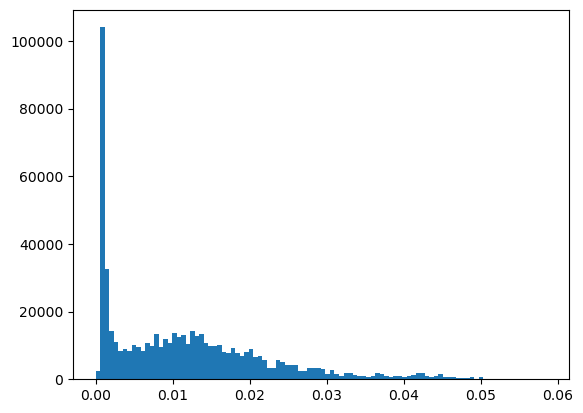

In [6]:
print("%.3f  %.3f   %.3f   %.3f" % (envs.mean().item(), envs.std().item(), envs.max().item(), envs.min().item()))
plt.hist(envs.flatten().numpy(), bins=100);

In [7]:
eegs = (eegs - eegs.mean(axis=(1, 2), keepdim=True)) / eegs.std(axis=(1, 2), keepdim=True)
envs = (envs - envs.mean(axis=(1, 2), keepdim=True)) / envs.std(axis=(1, 2), keepdim=True)
print(eegs.shape, envs.shape)
print(eegs.mean().item(), eegs.std().item(), eegs.max().item(), eegs.min().item())
print(envs.mean().item(), envs.std().item(), envs.max().item(), envs.min().item())

torch.Size([180, 64, 3200]) torch.Size([180, 1, 3200])
1.2252066028395348e-10 0.9999975562095642 76.64783477783203 -44.467472076416016
4.153781318905203e-08 0.9998446106910706 4.389182090759277 -1.1135669946670532


In [8]:
# Unfold EEG data with sliding window of size 5 seconds and stride 5 seconds.
fs = 64
nchans = 64
window_length = 5 * fs
eegs_unf = F.unfold(eegs.unsqueeze(1), (nchans, window_length), stride=window_length , padding=0)
print(eegs_unf.shape)
eegs_unf = eegs_unf.permute(0, 2, 1).reshape(-1, eegs_unf.shape[-1], nchans, window_length)
print(eegs_unf.shape)

torch.Size([180, 20480, 10])
torch.Size([180, 10, 64, 320])


In [9]:
# Unfold Envelope data with sliding window of size 5 seconds and stride 5 seconds.
fs_env = 64
nchans_env = 1
window_length_env = 5 * fs_env
envs_unf = F.unfold(envs.unsqueeze(1), (nchans_env, window_length_env), stride=window_length_env, padding=0)
print(envs_unf.shape)
envs_unf = envs_unf.permute(0, 2, 1).reshape(-1, envs_unf.shape[-1], nchans_env, window_length_env)
print(envs_unf.shape)

torch.Size([180, 320, 10])
torch.Size([180, 10, 1, 320])


In [10]:
Xtr_eeg = eegs_unf[0, :, :, :].unsqueeze(1)
Xtr_env = envs_unf[0, :, :, :].unsqueeze(1)
print(Xtr_eeg.shape, Xtr_env.shape)

torch.Size([10, 1, 64, 320]) torch.Size([10, 1, 1, 320])


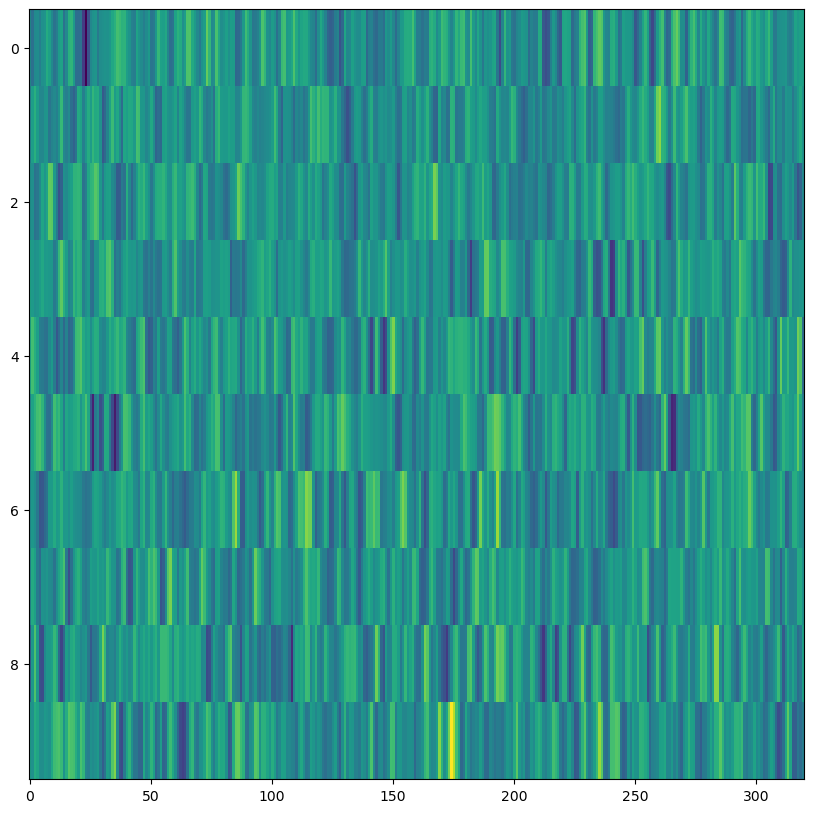

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(Xtr_eeg[:, :, 10, :].squeeze(), aspect='auto', interpolation='nearest')

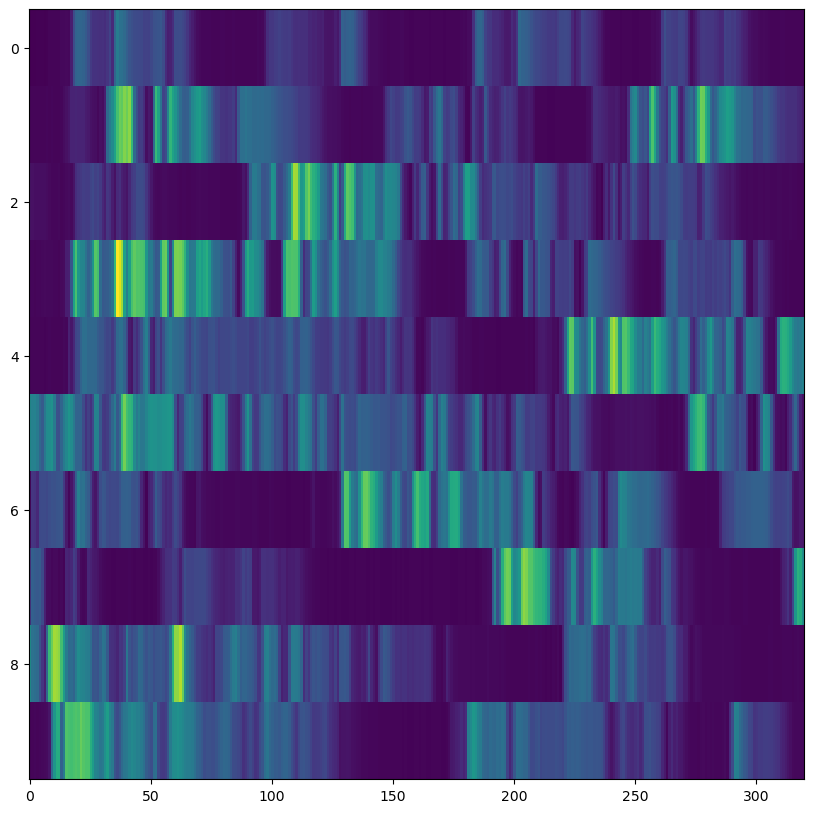

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(Xtr_env.squeeze(), aspect='auto', interpolation='nearest')

## Split the dataset





## Model

In [13]:
class Conv2d(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, **kargs):
        super().__init__(in_channels, out_channels, kernel_size, **kargs)

    def __call__(self, inp):
        self.out = super().__call__(inp)

        if self.out.requires_grad:
            self.out.retain_grad()

        return self.out
    
    # -----------------------------------------------------------------------------------------------
class Flatten:
    
  def __call__(self, x):
    self.out = x.view(x.shape[0], -1)
    return self.out
  
  def parameters(self):
    return []
  
  # -----------------------------------------------------------------------------------------------
class Linear(nn.Linear):
    def __init__(self, x, y, **kargs):
        super().__init__(x, y, **kargs)

    def __call__(self, inp):
        self.out = super().__call__(inp)
        return self.out
  # -----------------------------------------------------------------------------------------------
   
class ELU(nn.ELU):
    def __init__(self, alpha=1.0, inplace=False):
        super().__init__(alpha=1.0, inplace=False)

    def __call__(self, inp):
        self.out = super().__call__(inp)
        if self.out.requires_grad:
            self.out.retain_grad()
        self.out.retain_grad()
        return self.out

  # -----------------------------------------------------------------------------------------------
class Sequential:
  
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        self.out = x
        return self.out

    def parameters(self):
        # get parameters of all layers and stretch them out into one list
        return [p for layer in self.layers for p in layer.parameters()]

    def named_parameters(self):
        # get parameters of all layers and stretch them out into one list
        return ((n, p) for layer in self.layers for n, p in layer.named_parameters())

In [14]:
# My implementation of the shallow convnet

fs = 64 # sampling rate
T = 5 * fs # number of time points in each trial
C = 64 # number of EEG channels
F1 = 8 # number of channels (depth) in the first conv layer
D = 2 # number of spatial filters in the second conv layer
F2 = D * F1 # number of channels (depth) in the pont-wise conv layer
num_classes = 4 # number of classes

shallow_covnet = Sequential([
    Conv2d(1, 40, (1, int(fs//2)), padding='same', bias=True),
    Conv2d(40, 40, (C, 1), padding=(0, 0), bias=False), nn.BatchNorm2d(40, affine=True), 
    nn.AvgPool2d((1, 75), (1, 15)), nn.Dropout(0.5),
    Conv2d(40, 4, kernel_size=(1, 30), padding='same', stride=(1, 1), bias=True),
    nn.Flatten(1, -1), # Flatten start_dim=1, end_dim=-1
    Linear(62*4, 4, bias=True),
])



<img src="images/eegnet_architecture.png" width="800"/>



<img src="images/eegnet_params.png" width="800"/>

In [15]:

class EEGEncoder(nn.Module):
    def __init__(self,             
            fs = 64, # sampling rate
            T = 5, # lenght of each trial in seconds
            C = 64, # number of EEG channels
            F1 = 8, # number of channels (depth) in the first conv layer
            D = 2, # number of spatial filters in the second conv layer
            F2 = None # number of channels (depth) in the pont-wise conv layer
        ):
        super(EEGEncoder, self).__init__()

        if F2 is None:
            F2 = D * F1

        self.eeg_encoder = nn.Sequential(
            Conv2d(1, F1, (1, int(fs/2)), padding='same', bias=True, groups=1),
            nn.BatchNorm2d(F1, affine=True),
            Conv2d(F1, out_channels=D*F1, kernel_size=(C, 1), padding=(0, 0), bias=False, groups=F1),

            nn.BatchNorm2d(D*F1, affine=True), ELU(), nn.AvgPool2d(1, 2), #nn.Dropout(0.5),
                    
            Conv2d(F2, F2, (1, int(fs/(2*4))), padding='same', bias=False, groups=D*F1),
            Conv2d(D*F1, F2, kernel_size=(1, 1), padding=(0, 0), groups=1, bias=False),
            nn.BatchNorm2d(F2, affine=True), ELU(), nn.AvgPool2d(1, 4), #nn.Dropout(0.5),

            nn.Flatten(),
            nn.Linear(F2*int((T*fs)//(2*4)), fs)
        ) 

    @torch.no_grad()
    def normalize_weights_eegnet(self):

        for name, param in self.eeg_encoder.named_parameters():
            if  name == 'weight' and param.ndim==4: # normalize conv weights to max norm 1
                param.data = torch.renorm(param.data, 2, 0, maxnorm=1)
                #param.data /=  eps + param.data.norm(2, dim=0, keepdim=True)
            elif name == 'weight' and param.ndim==2: # normalize fc weights to max norm 0.25
                param.data = torch.renorm(param.data, 2, 0, maxnorm=0.25)
                #param.data /=  eps + param.data.norm(2, dim=0, keepdim=True)


    def forward(self, x):
        x = self.eeg_encoder(x)
        return x

eeg_encoder = EEGEncoder()
eeg_encoder.eeg_encoder

Sequential(
  (0): Conv2d(1, 8, kernel_size=(1, 32), stride=(1, 1), padding=same)
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Conv2d(8, 16, kernel_size=(64, 1), stride=(1, 1), groups=8, bias=False)
  (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): ELU(alpha=1.0)
  (5): AvgPool2d(kernel_size=1, stride=2, padding=0)
  (6): Conv2d(16, 16, kernel_size=(1, 8), stride=(1, 1), padding=same, groups=16, bias=False)
  (7): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (8): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ELU(alpha=1.0)
  (10): AvgPool2d(kernel_size=1, stride=4, padding=0)
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=640, out_features=64, bias=True)
)

In [16]:
class EnvEncoder(nn.Module):

    def __init__(self,             
            fs = 64, # sampling rate
            T = 5, # lenght of each trial in seconds
            F1 = 8
        ):
        super(EnvEncoder, self).__init__()

        self.env_encoder = nn.Sequential(
            Conv2d(1, F1, (1, int(fs//2)), padding='same', bias=True),
            nn.BatchNorm2d(F1, affine=True), ELU(), nn.AvgPool2d(1, 2),
            Conv2d(F1, F1, (1, int(fs//8)), padding='same', bias=False, groups=F1),
            nn.BatchNorm2d(F1, affine=True), ELU(), nn.AvgPool2d(1, 4), 
            nn.Flatten(),
            nn.Linear(F1*int((T*fs)//(2*4)), fs)
        ) 

    def forward(self, x):
        x = self.env_encoder(x)
        return x

env_encoder = EnvEncoder()
env_encoder.env_encoder

Sequential(
  (0): Conv2d(1, 8, kernel_size=(1, 32), stride=(1, 1), padding=same)
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ELU(alpha=1.0)
  (3): AvgPool2d(kernel_size=1, stride=2, padding=0)
  (4): Conv2d(8, 8, kernel_size=(1, 8), stride=(1, 1), padding=same, groups=8, bias=False)
  (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ELU(alpha=1.0)
  (7): AvgPool2d(kernel_size=1, stride=4, padding=0)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=320, out_features=64, bias=True)
)

In [17]:
class CES(nn.Module):
    def __init__(self, 
                 eeg_encoder= eeg_encoder.eeg_encoder,
                 env_encoder = env_encoder.env_encoder): 
        super().__init__()

        self.eeg_encoder = eeg_encoder
        self.env_encoder = env_encoder
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))

    def encode_eeg(self, x):
        return self.eeg_encoder(x)
    
    def encode_env(self, x):
        return self.env_encoder(x)
    
    def forward(self, eeg, env):
        eeg_features = self.encode_eeg(eeg)
        env_features = self.encode_env(env)
        return eeg_features, env_features, self.logit_scale.exp()
  

model = CES()
for n,p in model.named_parameters():
    print(n, p.shape)


logit_scale torch.Size([])
eeg_encoder.0.weight torch.Size([8, 1, 1, 32])
eeg_encoder.0.bias torch.Size([8])
eeg_encoder.1.weight torch.Size([8])
eeg_encoder.1.bias torch.Size([8])
eeg_encoder.2.weight torch.Size([16, 1, 64, 1])
eeg_encoder.3.weight torch.Size([16])
eeg_encoder.3.bias torch.Size([16])
eeg_encoder.6.weight torch.Size([16, 1, 1, 8])
eeg_encoder.7.weight torch.Size([16, 16, 1, 1])
eeg_encoder.8.weight torch.Size([16])
eeg_encoder.8.bias torch.Size([16])
eeg_encoder.12.weight torch.Size([64, 640])
eeg_encoder.12.bias torch.Size([64])
env_encoder.0.weight torch.Size([8, 1, 1, 32])
env_encoder.0.bias torch.Size([8])
env_encoder.1.weight torch.Size([8])
env_encoder.1.bias torch.Size([8])
env_encoder.4.weight torch.Size([8, 1, 1, 8])
env_encoder.5.weight torch.Size([8])
env_encoder.5.bias torch.Size([8])
env_encoder.9.weight torch.Size([64, 320])
env_encoder.9.bias torch.Size([64])


## Model Setup

## Optimization

In [18]:

with torch.no_grad():
    for ix, layer in enumerate(model.eeg_encoder + model.env_encoder):
        if isinstance(layer, nn.Conv2d):
            layer.weight *= 0.1
            if layer.bias is not None:
                layer.bias *= 0


print(sum(p.nelement() for p in model.parameters())) # number of parameters in total
for p in model.parameters():
    p.requires_grad = True

print(model.eeg_encoder)
print(model.env_encoder)


63681
Sequential(
  (0): Conv2d(1, 8, kernel_size=(1, 32), stride=(1, 1), padding=same)
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Conv2d(8, 16, kernel_size=(64, 1), stride=(1, 1), groups=8, bias=False)
  (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): ELU(alpha=1.0)
  (5): AvgPool2d(kernel_size=1, stride=2, padding=0)
  (6): Conv2d(16, 16, kernel_size=(1, 8), stride=(1, 1), padding=same, groups=16, bias=False)
  (7): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (8): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ELU(alpha=1.0)
  (10): AvgPool2d(kernel_size=1, stride=4, padding=0)
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=640, out_features=64, bias=True)
)
Sequential(
  (0): Conv2d(1, 8, kernel_size=(1, 32), stride=(1, 1), padding=same)
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_

In [56]:
print(Xtr_eeg.shape, Xtr_env.shape)

torch.Size([10, 1, 64, 320]) torch.Size([10, 1, 1, 320])


# gradient not getting updateing
maybe because the chain removes the referencing ...

links to check for implementing the loss function:  

https://www.kaggle.com/code/moeinshariatnia/openai-clip-simple-implementation/notebook  


https://github.com/openai/CLIP/issues/83


https://github.com/mlfoundations/open_clip

https://github.com/mlfoundations/open_clip/blob/main/src/open_clip/loss.py

In [19]:
num_train = Xtr_eeg.shape[0]
batch_size = 8
max_steps = 10000
lossi = []
udri = [] # update / data ratio 
ud = []

for i in range(max_steps):

    # minibatch construct
    #ix = torch.randint(0, Xtr_eeg.shape[0], (batch_size,))
    ix = torch.randperm(num_train)[:batch_size]
    Xb_eeg, Xb_env = Xtr_eeg[ix, :, :, :], Xtr_env[ix, :, :, :] # batch X, Y

    # forward pass
    eeg_features, env_features, logit_scale = model(Xb_eeg, Xb_env) 

    # normalized features
    eeg_features_n = eeg_features / eeg_features.norm(dim=1, keepdim=True)
    env_features_n = env_features / env_features.norm(dim=1, keepdim=True)


    logits_per_eeg = logit_scale * eeg_features_n @ env_features_n.t()
    logits_per_env = logits_per_eeg.t()
    #loss function
    labels = torch.arange(batch_size)
    loss_eeg = F.cross_entropy(logits_per_eeg, labels)
    loss_env = F.cross_entropy(logits_per_env, labels)
    loss   = (loss_eeg + loss_env)/2

    # Non-Binary labels approach
    #logits = (eeg_features @ env_features.T) / 2
    #eegs_similarity = eeg_features_n @ eeg_features_n.T
    #nvs_similarity = env_features_n @ env_features_n.T
    #targets = F.softmax(
    #    (eegs_similarity + envs_similarity) / 2,  dim=-1)
    #loss_eeg = F.cross_entropy(logits, targets)
    #loss_env = F.cross_entropy(logits.T, targets.T)
    #loss =  (loss_eeg + loss_env) / 2.0 # shape: (batch_size)


    # backward pass
    for p in model.parameters():
        p.grad = None
    loss.backward()

    # update: simple SGD
    lr = 0.01 if i < 2000 else 0.001 # step learning rate decay
    #lr = 0.001
    for p in model.parameters():
        p.data += -lr * p.grad


        
    # normalize weights
    #with torch.no_grad():
    #    normalize_weights_eegnet(eeg_encoder)

    # track stats
    if i % 1 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}  {loss_eeg.item():.4f}  {loss_env.item():.4f}   {eeg_features.detach().std().item():.4f}  {env_features.detach().std().item():.4f}')
    lossi.append(loss.log10().item())
    with torch.no_grad():
        ud.append([(lr*p.grad.std() / p.data.std()).log10().item() for p in model.parameters() ])


    
    #break


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525699189/work/aten/src/ATen/native/Convolution.cpp:896.)
  return F.conv2d(input, weight, bias, self.stride,


      0/  10000: 2.8359  2.8487  2.8232   0.2911  0.4565
      1/  10000: 3.0029  2.9201  3.0856   0.4228  0.4911
      2/  10000: 0.7600  0.6690  0.8510   0.6030  0.5141
      3/  10000: 0.6047  0.7367  0.4726   0.6139  0.5047
      4/  10000: 0.0603  0.0775  0.0432   0.6085  0.5078
      5/  10000: 0.0119  0.0125  0.0113   0.6222  0.5157
      6/  10000: 0.0101  0.0089  0.0112   0.6109  0.5007
      7/  10000: 0.0097  0.0094  0.0099   0.6242  0.5016
      8/  10000: 0.0069  0.0068  0.0070   0.5997  0.5053
      9/  10000: 0.0071  0.0071  0.0071   0.6158  0.5102
     10/  10000: 0.0062  0.0068  0.0055   0.6210  0.5149
     11/  10000: 0.0052  0.0053  0.0050   0.6083  0.5054
     12/  10000: 0.0052  0.0053  0.0051   0.6177  0.5025
     13/  10000: 0.0048  0.0046  0.0049   0.5957  0.5122
     14/  10000: 0.0056  0.0056  0.0056   0.5995  0.5069
     15/  10000: 0.0052  0.0052  0.0052   0.5993  0.5068
     16/  10000: 0.0044  0.0046  0.0042   0.5984  0.5032
     17/  10000: 0.0044  0.0043

In [61]:
p

Parameter containing:
tensor(2.6593, requires_grad=True)

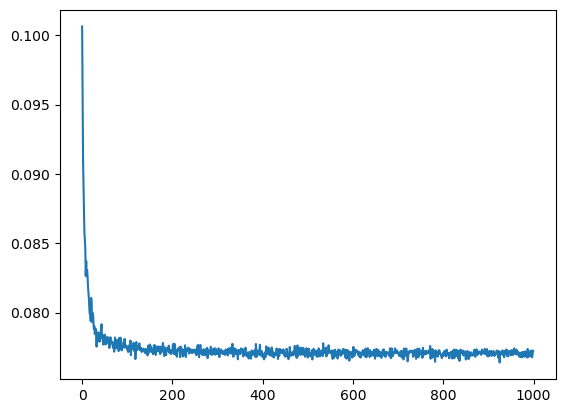

In [24]:
lossi_tensor = torch.tensor(lossi).reshape(10, -1).mean(0)
plt.plot(lossi_tensor)

In [402]:
print(logits_per_eeg)
counts = logits_per_eeg.exp()
print(counts)
pros = counts / counts.sum(1, keepdim=True)
print(pros)


tensor([[ 0.9977, -0.1030, -0.1398, -0.1248, -0.1276, -0.1139, -0.1309, -0.1159],
        [-0.1101,  0.9981, -0.0727, -0.0412, -0.1044, -0.0895, -0.1038, -0.1165],
        [-0.1394, -0.0662,  0.9969, -0.1151, -0.1180, -0.1231, -0.0947, -0.1137],
        [-0.1209, -0.0250, -0.1258,  0.9973, -0.0867, -0.1009, -0.1046, -0.1218],
        [-0.1232, -0.0755, -0.0884, -0.0788,  0.9973, -0.1125, -0.1074, -0.1115],
        [-0.1285, -0.0984, -0.1470, -0.1291, -0.1362,  0.9977, -0.0753, -0.1556],
        [-0.1453, -0.1185, -0.1389, -0.1443, -0.1636, -0.0633,  0.9968, -0.1241],
        [-0.1103, -0.0928, -0.1115, -0.1133, -0.1148, -0.1242, -0.0966,  0.9972]],
       grad_fn=<MmBackward0>)
tensor([[2.7120, 0.9022, 0.8695, 0.8826, 0.8802, 0.8923, 0.8773, 0.8906],
        [0.8958, 2.7131, 0.9299, 0.9596, 0.9008, 0.9144, 0.9015, 0.8901],
        [0.8699, 0.9359, 2.7100, 0.8913, 0.8887, 0.8842, 0.9097, 0.8925],
        [0.8862, 0.9753, 0.8818, 2.7109, 0.9170, 0.9040, 0.9007, 0.8853],
        [0.8841, 

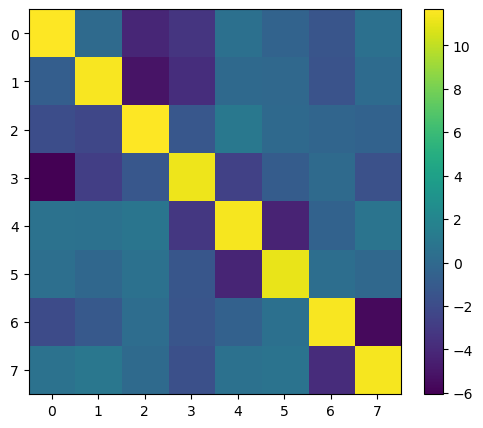

In [20]:
plt.figure(figsize=(6, 5))
plt.imshow(logits_per_eeg.detach().numpy(), aspect='auto')
plt.colorbar()
plt.show()

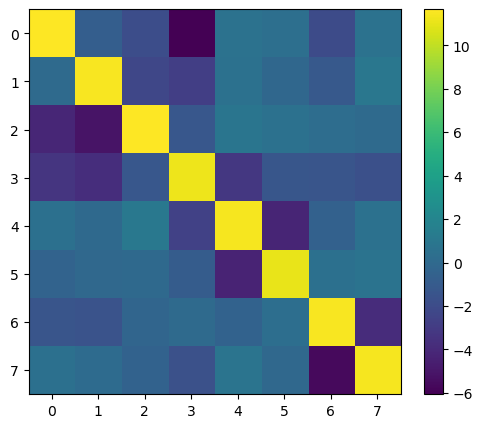

In [21]:
plt.figure(figsize=(6, 5))
plt.imshow(logits_per_env.detach().numpy(), aspect='auto')
plt.colorbar()
plt.show()

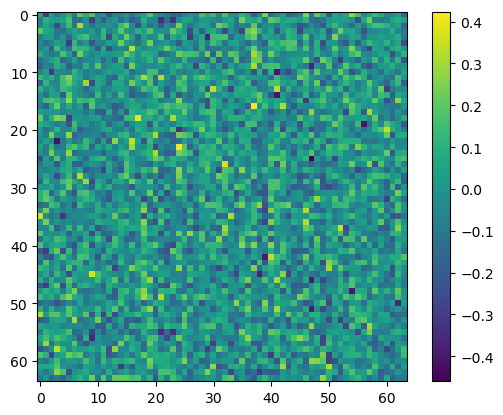

In [221]:
plt.imshow(eeg_features.detach().numpy())
plt.colorbar()

TypeError: Invalid shape (64, 64, 320) for image data

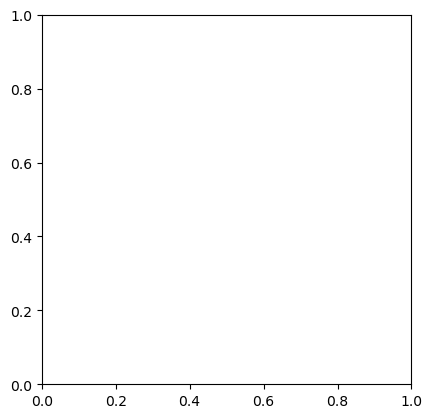

In [227]:
plt.imshow(Xb_eeg.squeeze().numpy())
plt.colorbar()

In [192]:
print( "%.4f, %.4f" % (logits_per_eeg.mean().item(), logits_per_env.mean().item()) )
print( "%.4f, %.4f" % (logits_per_eeg.max().item(), logits_per_env.max().item()) )
print( "%.4f, %.4f" % (logits_per_eeg.min().item(), logits_per_env.min().item()) )
print( "%.4f, %.4f" % (logits_per_eeg.std().item(), logits_per_env.std().item()) )

0.1732, 0.1732
0.1772, 0.1772
0.1693, 0.1693
0.0017, 0.0017


In [109]:
torch.tensor(1/32).log()

tensor(-3.4657)

layer 4 (       ELU):  mean  +0.098448, std 6.123393e-01, range [-9.995818e-01  5.253291e+00]
torch.Size([64, 16, 1, 320])
layer 9 (       ELU):  mean  +0.000006, std 5.543732e-03, range [-2.649647e-02  3.521960e-02]
torch.Size([64, 16, 1, 160])
layer 2 (       ELU):  mean  +0.082368, std 5.338678e-01, range [-9.209993e-01  2.188628e+00]
torch.Size([64, 8, 1, 320])
layer 6 (       ELU):  mean  +0.080532, std 5.527328e-01, range [-8.674114e-01  2.275359e+00]
torch.Size([64, 8, 1, 160])
layer 4 (       ELU):  mean  +0.000000, std 3.678346e-09
layer 9 (       ELU):  mean  -0.000000, std 6.146285e-07
layer 2 (       ELU):  mean  +0.000000, std 1.394169e-05
layer 6 (       ELU):  mean  -0.000000, std 1.717678e-05


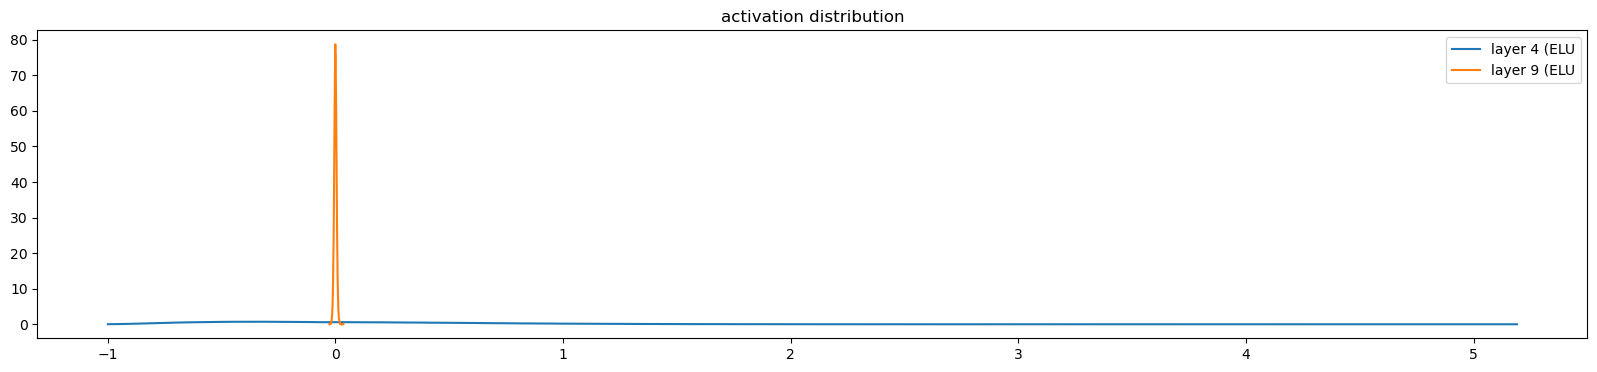

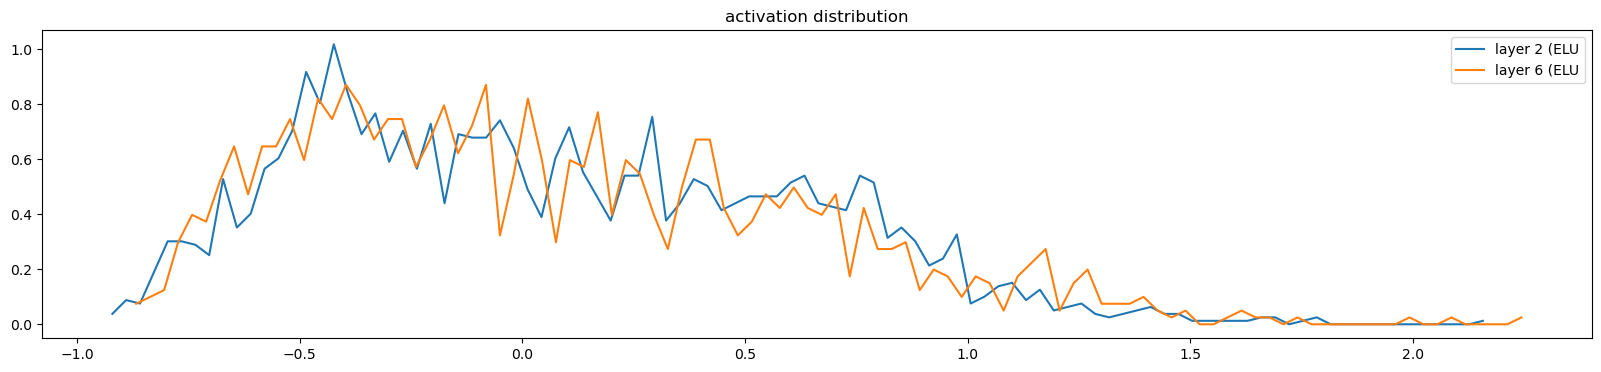

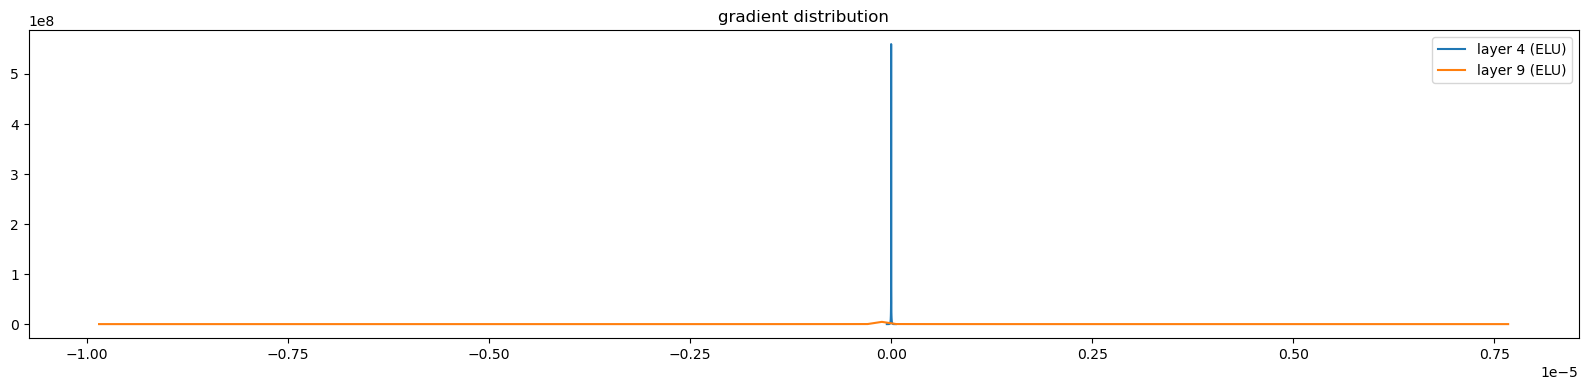

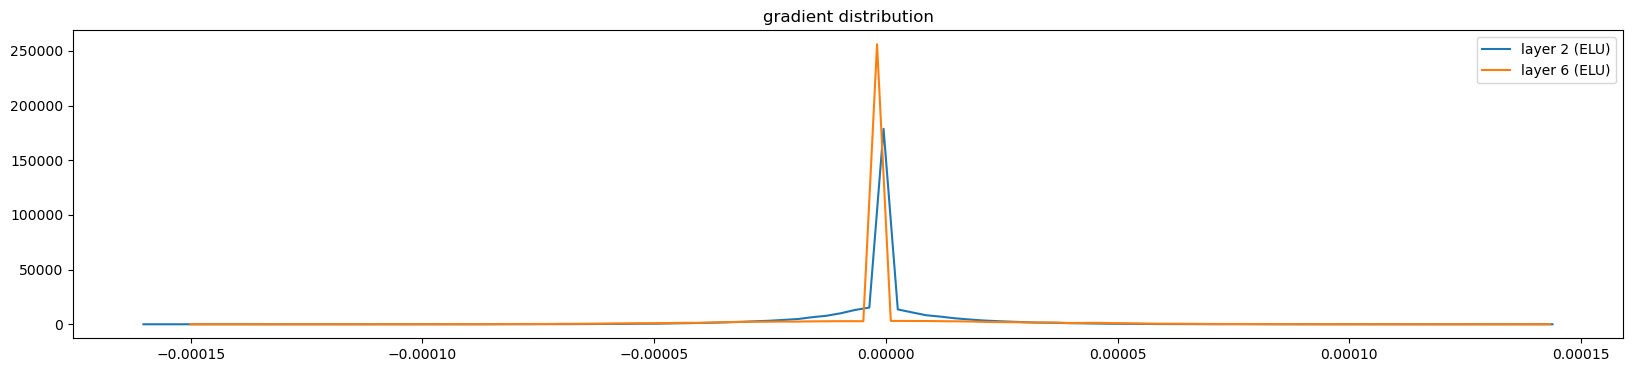

In [158]:
# ELU Activations and their gradients

plt.figure(figsize=(20, 4)); # width and height of the plot
legends = []
for i, layer in enumerate(eeg_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, (ELU)):
        t = layer.out
        print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
        print(t.shape)
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
    plt.legend(legends);
    plt.title('activation distribution')



plt.figure(figsize=(20, 4)); # width and height of the plot
legends = []
for i, layer in enumerate(env_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, (ELU)):
        t = layer.out
        print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
        print(t.shape)
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
    plt.legend(legends);
    plt.title('activation distribution')


plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(eeg_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, ELU):
        t = layer.out.grad
        print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends);
    plt.title('gradient distribution')


plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(env_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, ELU):
        t = layer.out.grad
        print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends);
    plt.title('gradient distribution')


layer 0 (    Conv2d):  mean  -0.000000, std 5.700317e-02, range [-2.139304e+00  2.480625e+00]
torch.Size([32, 8, 64, 320])
layer 2 (    Conv2d):  mean  -0.000576, std 5.730164e-02, range [-4.991311e-01  4.310413e-01]
torch.Size([32, 16, 1, 320])
layer 7 (    Conv2d):  mean  +0.001114, std 6.557070e-02, range [-5.847119e-01  7.622194e-01]
torch.Size([32, 16, 1, 160])
layer 8 (    Conv2d):  mean  +0.000009, std 3.845580e-03, range [-2.887005e-02  2.670536e-02]
torch.Size([32, 16, 1, 160])
layer 0 (    Conv2d):  mean  +0.000752, std 3.365854e-02, range [-9.884031e-02  1.024206e-01]
torch.Size([32, 8, 1, 320])
layer 4 (    Conv2d):  mean  +0.001146, std 5.498387e-02, range [-1.974403e-01  2.146260e-01]
torch.Size([32, 8, 1, 160])
layer 0 (    Conv2d):  mean  -0.000000, std 1.582230e-04
layer 2 (    Conv2d):  mean  -0.000000, std 8.403237e-04
layer 7 (    Conv2d):  mean  +0.000000, std 8.606440e-04
layer 8 (    Conv2d):  mean  +0.000000, std 1.479133e-02
layer 0 (    Conv2d):  mean  +0.0000

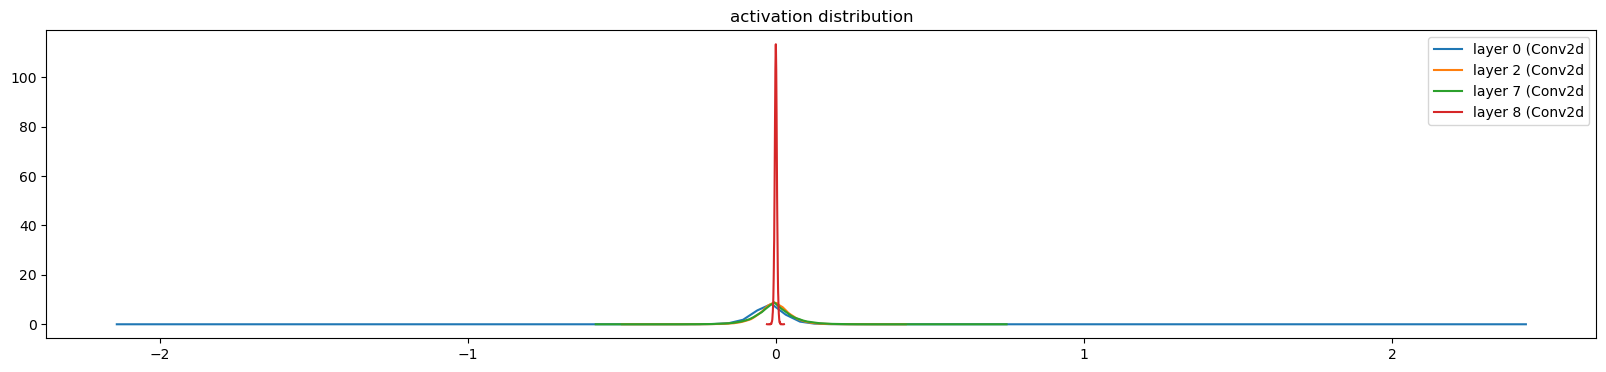

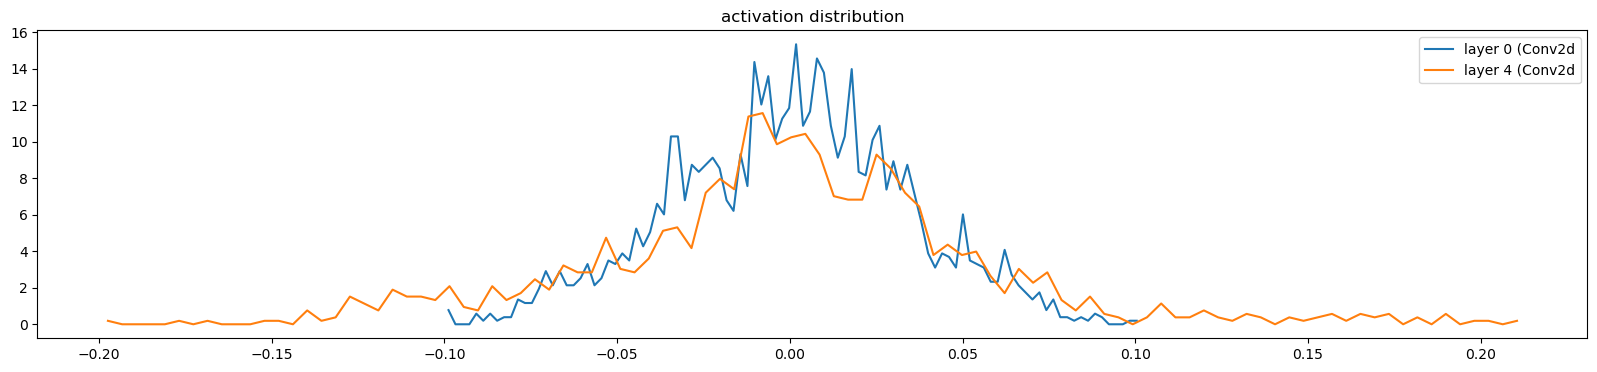

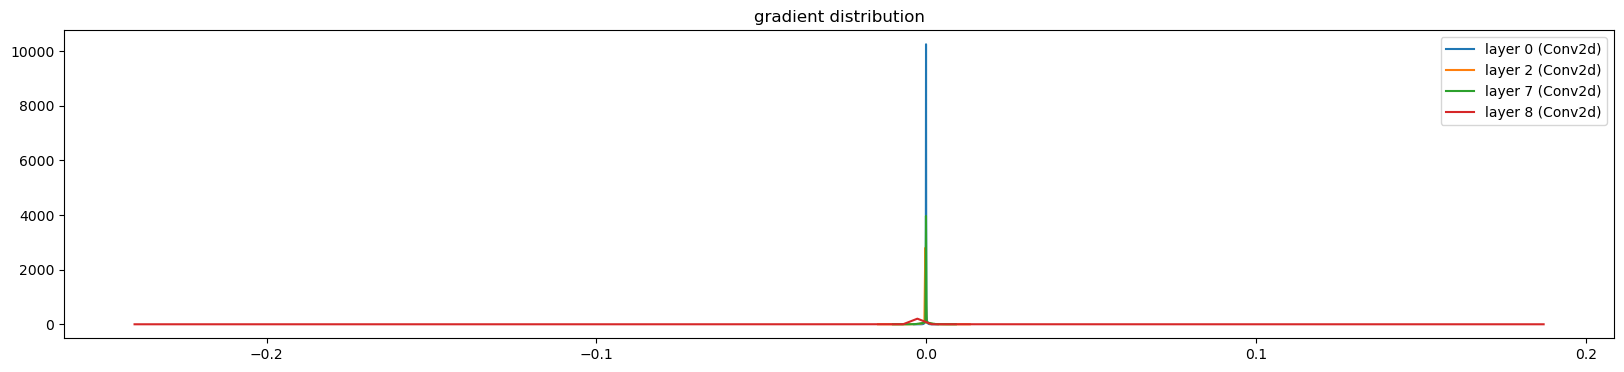

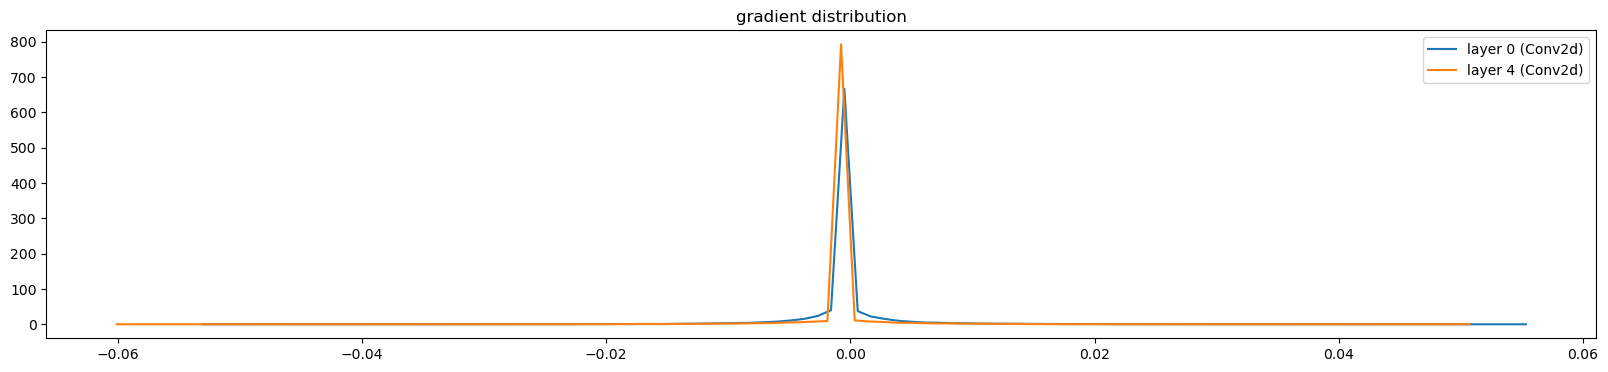

In [135]:
# Conv2d Activations and their gradients

plt.figure(figsize=(20, 4)); # width and height of the plot
legends = []
for i, layer in enumerate(eeg_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, (Conv2d)):
        t = layer.out
        print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
        print(t.shape)
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
    plt.legend(legends);
    plt.title('activation distribution')


plt.figure(figsize=(20, 4)); # width and height of the plot
legends = []
for i, layer in enumerate(env_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, (Conv2d)):
        t = layer.out
        print('layer %d (%10s):  mean  %+f, std %e, range [%e  %e]' % (i, layer.__class__.__name__, t.mean(), t.std(), t.min(), t.max()))
        print(t.shape)
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__}')
    plt.legend(legends);
    plt.title('activation distribution')


plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(eeg_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, Conv2d):
        t = layer.out.grad
        print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends);
    plt.title('gradient distribution')


plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(env_encoder[:-1]): # note: exclude the output layer
    if isinstance(layer, Conv2d):
        t = layer.out.grad
        print('layer %d (%10s):  mean  %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
    plt.legend(legends);
    plt.title('gradient distribution')

weight (8, 1, 1, 32) | mean +0.000110 | std 4.187722e-03 | grad:data ratio 4.104975e-02
weight (16, 1, 64, 1) | mean -0.000000 | std 1.628790e-03 | grad:data ratio 2.013241e-02
weight (16, 1, 1, 8) | mean -0.000381 | std 9.939726e-03 | grad:data ratio 7.911483e-02
weight (16, 16, 1, 1) | mean +0.000200 | std 5.999943e-03 | grad:data ratio 6.570660e-02


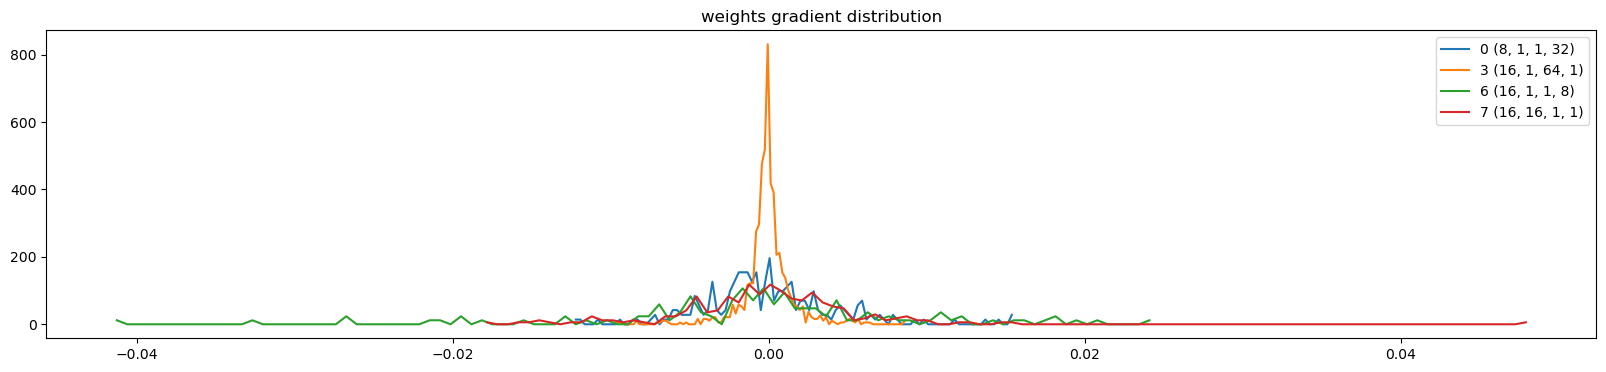

In [96]:

# Visualize weights and their gradients

plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, p in enumerate(eeg_encoder.parameters()):
    t = p.grad
    #print(i, t.shape)
    if p.ndim == 4:
        print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std() ))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'{i} {tuple(p.shape)}')
    plt.legend(legends);
    plt.title('weights gradient distribution')

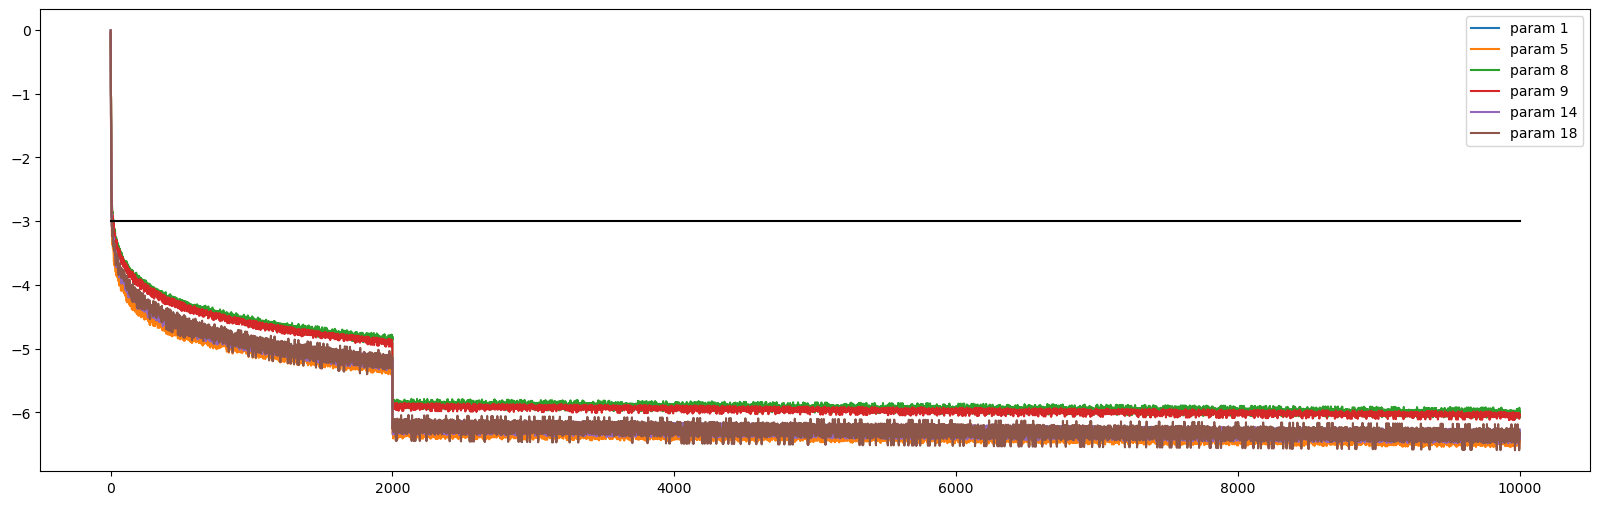

In [22]:
plt.figure(figsize=(20, 6))
legends = []
for i, p in enumerate(model.parameters()):
    if p.ndim == 4:
        plt.plot([ud[j][i] for j in range(len(ud))])
        legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these rations should be ~1e-3, indicate on plot.
plt.legend(legends);

In [200]:
for n, p in EEGNet.named_parameters():
    if p.ndim == 4:
        print(n, torch.norm(p, dim=(2, 3)))
normalize_weights_eegnet(EEGNet)
for n, p in EEGNet.named_parameters():
    if p.ndim == 4:
        print(n, torch.norm(p, dim=(2, 3)))

weight tensor([[0.6915],
        [0.5577],
        [0.5278],
        [0.6320]], grad_fn=<SqrtBackward0>)
weight tensor([[0.5939],
        [0.5884],
        [0.5696],
        [0.5520],
        [0.5900],
        [0.5421],
        [0.5889],
        [0.6125],
        [0.5165],
        [0.5998],
        [0.4708],
        [0.6053],
        [0.5850],
        [0.5686],
        [0.5670],
        [0.5600]], grad_fn=<SqrtBackward0>)
weight tensor([[0.4558],
        [0.5600],
        [0.5151],
        [0.6034],
        [0.5388],
        [0.5390],
        [0.3890],
        [0.6365],
        [0.5950],
        [0.5377],
        [0.4516],
        [0.5553],
        [0.4037],
        [0.6745],
        [0.4414],
        [0.4887]], grad_fn=<SqrtBackward0>)
weight tensor([[0.0491, 0.1157, 0.2164, 0.2400, 0.1556, 0.0537, 0.0910, 0.0323, 0.0212,
         0.1013, 0.0759, 0.2010, 0.2058, 0.1035, 0.1619, 0.0795],
        [0.2160, 0.2353, 0.0962, 0.2443, 0.0362, 0.0147, 0.1257, 0.0918, 0.0193,
         0.2174, 0

In [170]:
def normalize_weights_eegnet(model, norm_rate=4, eps=1e-8):
    with torch.no_grad():
        for name, param in model.named_parameters():
            if 'depthwise_conv1.weight' in name:
                param.copy_(param / (eps + param.norm(2, dim=(2, 3), keepdim=True)))
                #print(model.depthwise_conv1.weight.norm(2, dim=(2, 3)))
            if name == 'fc.weight' in name:
                param.copy_(param / (eps + norm_rate * param.norm(2, dim=1, keepdim=True)))
            #print(model.depthwise_conv1.weight.data[0, :, :, :].squeeze())

'bias'

In [154]:

EEGNet.named_parameters()[0][0]


TypeError: 'zip' object is not subscriptable

In [162]:
# EEGNet
########################################################################################################################
class EEGNet(nn.Module):
    def __init__(self, fs=64, T=64*5, F1=8, D=2, C=42, F2=None, dropout_rate=0.25):
        super(EEGNet, self).__init__()

        self.dropout_rate = dropout_rate

        # Block 1
        kernel_conv = (1, int(fs/2)-1)
        pad_conv = (0, int((kernel_conv[1]-1)/2)) # Since the kernel is one-dimensional, no need to pad along the 1 dimension
        in_channels = 1  # Here channel refers to depth NOT channels of EEG data

        # Here groups is specified to in_channels to implement depthwise convolution (no summation over channels)
        # However doesn't matter here as in_channels=1
        self.conv = nn.Conv2d(in_channels, F1, kernel_conv, padding=pad_conv, bias=False, groups=1)
        self.batchnorm1 = nn.BatchNorm2d(F1, affine=False)
        # Here once again a depthwise convolution (separate 2d kernels on each channel is applied)
        self.depthwise_conv1 = nn.Conv2d(in_channels=F1, out_channels=D*F1, kernel_size=(C, 1), padding=(0, 0), bias=False, groups=F1)
        self.batchnorm2 = nn.BatchNorm2d(D*F1, affine=False)
        self.avgpooling1 = nn.AvgPool2d(1, 4)


        # Block 2
        k_conv3 = (1, int(fs/(2*4))-1)
        pad_conv3 = (0, int((k_conv3[1]-1)/2))

        if not F2:
            F2 = D * F1  # Page 6 paragraph 3 of paper

        self.depthwise_conv2 = nn.Conv2d(D*F1, D*F1, k_conv3, padding=pad_conv3, bias=False, groups=D*F1)
        # For pointwise covolution, groups is set to 1, in order to apply a 3d kernel, summing over all channels
        self.pointwise_conv = nn.Conv2d(D*F1, F2, kernel_size=(1, 1), padding=(0, 0), groups=1, bias=False)
        self.batchnorm3 = nn.BatchNorm2d(F2, affine=False)
        self.avgpooling2 = nn.AvgPool2d(1, 8)

        # Fully Connected Layer
        self.fc = nn.Linear(F2*int(T//(4*8)), 1)

    def forward(self, x):

        dropout_rate = self.dropout_rate

        # Block 1
        x = self.conv(x)
        x = self.batchnorm1(x)
        x = self.depthwise_conv1(x)
        x = self.batchnorm2(x)
        x = F.elu(x)
        x = self.avgpooling1(x)
        x = F.dropout(x, dropout_rate)

        # Block 2
        x = self.depthwise_conv2(x)
        x = self.pointwise_conv(x)
        x = self.batchnorm3(x)
        x = F.elu(x)
        x = self.avgpooling2(x)
        x = F.dropout(x, dropout_rate)


        # Fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        out = torch.sigmoid(x).squeeze()
        return out


def normalize_weights_eegnet(model, norm_rate=4, eps=1e-8):
    # Double check gradients ...
    #print('wc applied!')
    with torch.no_grad():
        for name, param in model.named_parameters():
            if 'depthwise_conv1.weight' in name:
                param.copy_(param / (eps + param.norm(2, dim=(2, 3), keepdim=True)))
                #print(model.depthwise_conv1.weight.norm(2, dim=(2, 3)))
            if name == 'fc.weight' in name:
                param.copy_(param / (eps + norm_rate * param.norm(2, dim=1, keepdim=True)))
            #print(model.depthwise_conv1.weight.data[0, :, :, :].squeeze())

In [142]:
import numpy as np
from torch import nn
from torch.nn import init

import braindecode

from braindecode.util import np_to_th
from braindecode.models.modules import Expression, Ensure4d
from braindecode.models.functions import (
    safe_log, square, transpose_time_to_spat, squeeze_final_output
)


class ShallowFBCSPNet(nn.Sequential):
    """Shallow ConvNet model from Schirrmeister et al 2017.
    Model described in [Schirrmeister2017]_.
    Parameters
    ----------
    in_chans : int
        Number of EEG input channels.
    n_classes: int
        Number of classes to predict (number of output filters of last layer).
    input_window_samples: int | None
        Only used to determine the length of the last convolutional kernel if
        final_conv_length is "auto".
    n_filters_time: int
        Number of temporal filters.
    filter_time_length: int
        Length of the temporal filter.
    n_filters_spat: int
        Number of spatial filters.
    pool_time_length: int
        Length of temporal pooling filter.
    pool_time_stride: int
        Length of stride between temporal pooling filters.
    final_conv_length: int | str
        Length of the final convolution layer.
        If set to "auto", input_window_samples must not be None.
    conv_nonlin: callable
        Non-linear function to be used after convolution layers.
    pool_mode: str
        Method to use on pooling layers. "max" or "mean".
    pool_nonlin: callable
        Non-linear function to be used after pooling layers.
    split_first_layer: bool
        Split first layer into temporal and spatial layers (True) or just use temporal (False).
        There would be no non-linearity between the split layers.
    batch_norm: bool
        Whether to use batch normalisation.
    batch_norm_alpha: float
        Momentum for BatchNorm2d.
    drop_prob: float
        Dropout probability.
         """

    def __init__(
        self,
        in_chans,
        n_classes,
        input_window_samples=None,
        n_filters_time=40,
        filter_time_length=25,
        n_filters_spat=40,
        pool_time_length=75,
        pool_time_stride=15,
        final_conv_length=30,
        conv_nonlin=square,
        pool_mode="mean",
        pool_nonlin=safe_log,
        split_first_layer=True,
        batch_norm=True,
        batch_norm_alpha=0.1,
        drop_prob=0.5,
    ):
        super().__init__()
        if final_conv_length == "auto":
            assert input_window_samples is not None
        self.in_chans = in_chans
        self.n_classes = n_classes
        self.input_window_samples = input_window_samples
        self.n_filters_time = n_filters_time
        self.filter_time_length = filter_time_length
        self.n_filters_spat = n_filters_spat
        self.pool_time_length = pool_time_length
        self.pool_time_stride = pool_time_stride
        self.final_conv_length = final_conv_length
        self.conv_nonlin = conv_nonlin
        self.pool_mode = pool_mode
        self.pool_nonlin = pool_nonlin
        self.split_first_layer = split_first_layer
        self.batch_norm = batch_norm
        self.batch_norm_alpha = batch_norm_alpha
        self.drop_prob = drop_prob

        self.add_module("ensuredims", Ensure4d())
        pool_class = dict(max=nn.MaxPool2d, mean=nn.AvgPool2d)[self.pool_mode]

        if self.split_first_layer:
            self.add_module("dimshuffle", Expression(transpose_time_to_spat))
            self.add_module(
                "conv_time",
                nn.Conv2d(
                    1,
                    self.n_filters_time,
                    (self.filter_time_length, 1),
                    stride=1,
                ),
            )
            self.add_module(
                "conv_spat",
                nn.Conv2d(
                    self.n_filters_time,
                    self.n_filters_spat,
                    (1, self.in_chans),
                    stride=1,
                    bias=not self.batch_norm,
                ),
            )
            n_filters_conv = self.n_filters_spat
        else:
            self.add_module(
                "conv_time",
                nn.Conv2d(
                    self.in_chans,
                    self.n_filters_time,
                    (self.filter_time_length, 1),
                    stride=1,
                    bias=not self.batch_norm,
                ),
            )
            n_filters_conv = self.n_filters_time

        if self.batch_norm:
            self.add_module(
                "bnorm",
                nn.BatchNorm2d(
                    n_filters_conv, momentum=self.batch_norm_alpha, affine=True
                ),
            )
        self.add_module("conv_nonlin_exp", Expression(self.conv_nonlin))
        self.add_module(
            "pool",
            pool_class(
                kernel_size=(self.pool_time_length, 1),
                stride=(self.pool_time_stride, 1),
            ),
        )
        self.add_module("pool_nonlin_exp", Expression(self.pool_nonlin))
        self.add_module("drop", nn.Dropout(p=self.drop_prob))
        self.eval()
        if self.final_conv_length == "auto":
            out = self(
                np_to_th(
                    np.ones(
                        (1, self.in_chans, self.input_window_samples, 1),
                        dtype=np.float32,
                    )
                )
            )
            n_out_time = out.cpu().data.numpy().shape[2]
            self.final_conv_length = n_out_time
        self.add_module(
            "conv_classifier",
            nn.Conv2d(
                n_filters_conv,
                self.n_classes,
                (self.final_conv_length, 1),
                bias=True,
            ),
        )
        self.add_module("softmax", nn.LogSoftmax(dim=1))
        self.add_module("squeeze", Expression(squeeze_final_output))

        # Initialization, xavier is same as in paper...
        init.xavier_uniform_(self.conv_time.weight, gain=1)
        # maybe no bias in case of no split layer and batch norm
        if self.split_first_layer or (not self.batch_norm):
            init.constant_(self.conv_time.bias, 0)
        if self.split_first_layer:
            init.xavier_uniform_(self.conv_spat.weight, gain=1)
            if not self.batch_norm:
                init.constant_(self.conv_spat.bias, 0)
        if self.batch_norm:
            init.constant_(self.bnorm.weight, 1)
            init.constant_(self.bnorm.bias, 0)
        init.xavier_uniform_(self.conv_classifier.weight, gain=1)
        init.constant_(self.conv_classifier.bias, 0)

In [ ]:
lre = torch.linspace(-3, 0, 100)
lrs = 10**lre # Exponentialy spaced!

# Now let's update the previous code
lri = []
lrei = [] # this is just for education
lossi = []
for i in range(100):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    Xb, Yb = Xtr, ytr#[ix] # batch X, Y

    # forward pass
    logits = model(Xb)
    loss = F.cross_entropy(logits, Yb) # loss function
    print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad =  None
    loss.backward()

    # Update 
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

        # normalize weights
    #normalize_weights_eegnet(model)

    # track stats
    lri.append(lr)
    lrei.append(lre[i])
    lossi.append(loss.item())

print(loss.item())
